# Курс "Программирование на Python"


# Тема 9. Библиотека pandas и графики

* [1. Библиотека pandas](#chapter1)
* [2. Загрузка данных](#chapter2)
* [3. Именованные ссылки и копирование](#chapter3)
* [4. Вывод строк, столбцов и значений](#chapter4)
* [5. Информация о датафрейме](#chapter5)
* [6. Описательный анализ данных](#chapter6) 
* [7. Сводные таблицы и группировки](#chapter7)
* [8. Частотный анализ данных](#chapter8)
* [9. Графический анализ данных](#chapter9)
* [10. Оценка нормальности распределения](#chapter10)
* [11. Построение графиков в библиотеке matplotlib](#chapter11)

## 1. Библиотека pandas <a class="anchor" id="chapter1"></a>

**Pandas** — программная библиотека на языке Python для обработки и анализа данных. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временными рядами. Название библиотеки происходит от эконометрического термина «панельные данные», используемого для описания многомерных структурированных наборов информации.

Библиотека pandas содержит набор модулей и функций, которые облегчают выполнения некоторых операций с использованием языка программирования Python. В нашем случае использование библиотеки облегчит предварительную обработку данных и последующий их анализ. Позволит получить хорошо структурированные и наглядные таблицы, содержащие статистические показатели, рассчитанные на основе данных.

[Шпаргалка по pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Преимущества pandas:
- удобное представление таблиц;
- много готовых методов для работы с данными;
- простота использования;
- простой синтаксис;
- строенные визуализации;
- работает с разными форматами хранения начальных данных.

Недостатки pandas:
- высокое потребление памяти;
- медленная работа с очень большими данными.

При импортировании библиотеки pandas мы её переименовываем в pd, и в дальнейшем будем к ней обращаться по названию pd.

In [20]:
import pandas as pd

В pandas реализованы типы данных с разным числом измерений: 
- одномерный тип (просто ряд) — Series,
- двумерный (таблица) — DataFrame, 
- трёхмерный — Panel. 

## 2. Загрузка данных <a class="anchor" id="chapter2"></a>

Откроем файл с названием **brics**, у него разрешение **csv** (сomma-separated values). Для этого используем метод **read_csv**. Для открытия других типов файлов используются соответствующие методы:

- **read_excel** для файлов созданных в MS Excel и имеющих разрешения xls или xlsx;
- **read_html** для веб-страниц, написанных на языке HTML;
- **read_stata** для файлов, созданных в Stata и имеющих разрешение dta, и т.д.

Наряду с названием файла методу **read_csv** можно передать ряд параметров, определяющих порядок обработки данных при считывании из файла. Подробнее про параметры метода можно прочесть по [ссылке]( https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


Считываем содержимое файла, в дальнейшем будем к нему обращаться по имени df. Файл находится в той же директории, что и текущий ноутбук.

In [21]:
df = pd.read_csv("brics.csv")

Функция `type()` возвращает тип объекта.

In [22]:
type(df)

pandas.core.frame.DataFrame

Создан объект `DataFrame`. Отразим его содержимое.

In [23]:
df

,id,country,capital,area,population
0,BR,Brasil,Brazilia,8.516,212.60
1,RU,Russia,Moscow,17.130,143.50
2,IN,India,New Delhi,3.287,1451.00
3,CH,China,Beijing,9.597,1409.00
4,SA,South Africa,Pretoria,1.221,64.01


Первая строка из файла автоматически становится индексами столбцов. У строк по умолчанию нет индексов, и им присваиваются номера начиная с 0 (левая колонка). Можно было бы загрузить файл так, чтобы первый столбец рассматривался как столбец с именами строк (индексами), для этого надо передать **pd.read_csv()** параметр **index_col** с номером нужного столбца.

In [24]:
df = pd.read_csv("brics.csv", index_col=0)  # указали, что первая колонка станет индексами строк
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


Теперь столбец слева (индекс) состоит не из последовательных чисел, а из строк.

In [25]:
df = pd.read_csv("brics.csv")
df

,id,country,capital,area,population
0,BR,Brasil,Brazilia,8.516,212.60
1,RU,Russia,Moscow,17.130,143.50
2,IN,India,New Delhi,3.287,1451.00
3,CH,China,Beijing,9.597,1409.00
4,SA,South Africa,Pretoria,1.221,64.01


Можно поменять индекс строк не на этапе считывания данных из файла, а позднее.

In [26]:
df = df.set_index('id')
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


Строка датафрейма называется «наблюдением» (observation), а столбец — «переменной» (variable). Данные в столбце должны быть однородны (например, может быть столбец, состоящий только из чисел или только из строк (string), но не может быть столбца, в котором есть и текстовые, и числовые значения), а в отдельной сроке таблицы данные могут быть разнородны.

## 3. Именованные ссылки и копирование <a class="anchor" id="chapter3"></a>

#### Ситуация 1: несколько имён у одного датафрейма

У нас есть объект DataFrame c именованной ссылкой на него `df`. То есть, `df` - это имя объекта, у объекта может быть несколько имён. В этом случае, для обращения к нему можно использовать любое из них.

In [27]:
df = pd.read_csv("brics.csv", index_col=0) 
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


In [28]:
df2 = df  # у объекта df появляется второе имя (именованная ссылка на него) df2

In [29]:
id(df)

5247963280

In [30]:
id(df2)

5247963280

Идентификаторы объектов одинаковые.

In [31]:
df2

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


In [32]:
df2['new'] = 'new'  # меняем объект используя имя df2

In [33]:
df2  # выводим содержимое изменённого объекта

,country,capital,area,population,new
id,,,,,
BR,Brasil,Brazilia,8.516,212.60,new
RU,Russia,Moscow,17.130,143.50,new
IN,India,New Delhi,3.287,1451.00,new
CH,China,Beijing,9.597,1409.00,new
SA,South Africa,Pretoria,1.221,64.01,new


In [34]:
df  # при обращении к объекту по имени df мы получаем тот же самый уже изменённый объект

,country,capital,area,population,new
id,,,,,
BR,Brasil,Brazilia,8.516,212.60,new
RU,Russia,Moscow,17.130,143.50,new
IN,India,New Delhi,3.287,1451.00,new
CH,China,Beijing,9.597,1409.00,new
SA,South Africa,Pretoria,1.221,64.01,new


#### Ситуация 2: копирование датафрейма с присвоением копии другого имени  

Мы можем на основе существующего объекта создать его копию (второй объект). У них будут разные имена, и модификация одного из объектов не повлияет на другой.

In [35]:
df = pd.read_csv("brics.csv", index_col=0)  # заново считываем файл

In [36]:
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


In [37]:
df3 = df.copy()  # создаём копию датафрейма присваивая ей имя df3

In [38]:
id(df)

5247861712

In [39]:
id(df3)

5247971664

Идентификаторы объектов разные.

In [40]:
df3

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


In [41]:
df3['new'] = 0  # меняем датафрейм, имеющий имя df3

In [42]:
df3

,country,capital,area,population,new
id,,,,,
BR,Brasil,Brazilia,8.516,212.60,0
RU,Russia,Moscow,17.130,143.50,0
IN,India,New Delhi,3.287,1451.00,0
CH,China,Beijing,9.597,1409.00,0
SA,South Africa,Pretoria,1.221,64.01,0


In [43]:
df  # объект с именем df не поменялся

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


## 4. Вывод строк, столбцов и значений <a class="anchor" id="chapter4"></a>

Можно вывести один столбце в виде ряда (series), указав его названия в одинарных квадратных скобках.

In [44]:
df['area']

id
BR     8.516
RU    17.130
IN     3.287
CH     9.597
SA     1.221
Name: area, dtype: float64

In [45]:
type(df['area'])

pandas.core.series.Series

При использовании двойных квадратных скобок выводится таблица (`dataframe`).

In [46]:
df[['area']]

,area
id,
BR,8.516
RU,17.130
IN,3.287
CH,9.597
SA,1.221


In [47]:
type(df[['area']])

pandas.core.frame.DataFrame

Можно вывести несколько столбцов, указав их индексы в любом порядке. При этом один столбец можно вывести несколько раз. 

In [48]:
df[['area', 'country', 'area']]

,area,country,area
id,,,
BR,8.516,Brasil,8.516
RU,17.130,Russia,17.130
IN,3.287,India,3.287
CH,9.597,China,9.597
SA,1.221,South Africa,1.221


Можно вывести строку, указав её индекс, при этом нужно использовать метод `loc`.

In [49]:
df.loc[['RU']]

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.13,143.5


Можно вывести несколько строк, перечислив их индексы. При этом можно вывести одну и ту же строку несколько раз.

In [50]:
df.loc[['RU', 'SA', 'BR', 'RU']]

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.130,143.50
SA,South Africa,Pretoria,1.221,64.01
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50


Метод `at` позволяет обратиться к конкретному элементу таблицы по индексу строки и столбца. Сначала передаётся индекс строки, а потом индекс столбца. Работает быстрее, чем loc(), если нужно найти одно значение.

In [51]:
df.at['RU', 'capital'] 

'Moscow'

То же самое можно получить с помощью метода `loc`.

In [52]:
df.loc['RU', 'capital']  

'Moscow'

Ещё один вариант получения значения на пересечении столбца и строки.

In [53]:
df['capital']['RU'] 

'Moscow'

Методу `loc` можно передать список из нескольких столбцов и строк.

In [54]:
df.loc[['RU', 'BR'], ['capital', 'population']]

,capital,population
id,,
RU,Moscow,143.5
BR,Brazilia,212.6


In [55]:
df.loc[['RU', 'BR'], :]  # вместо списка столбцов можно передать :, что означает "все столбцы"

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.130,143.5
BR,Brasil,Brazilia,8.516,212.6


In [56]:
df.loc[:, ['capital', 'population']]  # вместо списка строк можно передать :, что означает "все строки"

,capital,population
id,,
BR,Brazilia,212.60
RU,Moscow,143.50
IN,New Delhi,1451.00
CH,Beijing,1409.00
SA,Pretoria,64.01


Метод `loc` работает с установленными индексами строк и столбцов, а если необходимо использовать их порядковые номера, то используется метод `iloc`.

In [57]:
df.iloc[[1]]  # вторая строка

,country,capital,area,population
id,,,,
RU,Russia,Moscow,17.13,143.5


In [58]:
df.iloc[1, 2]  # ячейка во второй строке, третьем столбце

17.13

Аналогично метод `at` позволяет найти значение по установленным индексам строки и столбца. А методу `iat` передаются порядковые номера строки и столбца.  

In [59]:
df

,country,capital,area,population
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


In [60]:
df.at['RU', 'capital']

'Moscow'

In [61]:
df.iat[1, 1]  # второй столбец, вторая строка

'Moscow'

Узнать индекс строки.

In [62]:
print(df.index.get_loc('RU'))
print(df.index.get_loc('CH'))

1
3


Узнать индекс столбца.

In [63]:
print(df.columns.get_loc('capital'))
print(df.columns.get_loc('population'))

1
3


### Работа с индексами столбцов и строк

Можно вывести индексы столбцов и строк в виде списка.

In [64]:
df.index  # вывести индексы строк

Index(['BR', 'RU', 'IN', 'CH', 'SA'], dtype='object', name='id')

In [65]:
df.columns  # вывести индексы столбцов

Index(['country', 'capital', 'area', 'population'], dtype='object')

Можно изменить индексы столбцов

In [66]:
df.columns = ['country_new', 'capital_new', 'area_old', 'populat_new'] 
df

,country_new,capital_new,area_old,populat_new
id,,,,
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


Слово id при отображении датафрейма — имя столбца с индексами. Можно его удалить

In [67]:
df.index.name = None  # убрать имя столбца с индексами

In [68]:
df

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


### Срезы

In [69]:
df

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.60
RU,Russia,Moscow,17.130,143.50
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


Срез осуществляется по срокам на основе числовых индексов. Нумерация начинается с 0, последний элемент не включается в вывод.

In [70]:
df[2:4]  # с 3-ей по 4-ую строки

,country_new,capital_new,area_old,populat_new
IN,India,New Delhi,3.287,1451.0
CH,China,Beijing,9.597,1409.0


In [71]:
df['RU':'CH']  # срез по срокам на основе текстовых индексов, крайние элементы включены в вывод

,country_new,capital_new,area_old,populat_new
RU,Russia,Moscow,17.130,143.5
IN,India,New Delhi,3.287,1451.0
CH,China,Beijing,9.597,1409.0


In [72]:
df[0:1]  # первая строка

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.6


In [73]:
df[:3]  # первые три строки, начальный элемент среза не указан

,country_new,capital_new,area_old,populat_new
BR,Brasil,Brazilia,8.516,212.6
RU,Russia,Moscow,17.130,143.5
IN,India,New Delhi,3.287,1451.0


In [74]:
df[-3:]  # последние три строки

,country_new,capital_new,area_old,populat_new
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


In [75]:
df[2:]  # последние три строки

,country_new,capital_new,area_old,populat_new
IN,India,New Delhi,3.287,1451.00
CH,China,Beijing,9.597,1409.00
SA,South Africa,Pretoria,1.221,64.01


## 5. Информация о датафрейме <a class="anchor" id="chapter5"></a>

### Файл с данными про ноутбуки

[Источник данных](https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset)

The dataset presents a collection of 991 unique laptops sourced from the 'Smartprix' website. Enriched with 22 features including laptop name, price in Indian rupees, processor, GPU, and more, it provides valuable insights for building robust price prediction models and effective recommendation systems. Updated as of January 14, 2024, this dataset is a reliable foundation for exploring the intricate landscape of laptop pricing dynamics and consumer preferences.

Описание переменных:

- Brand: The name of the laptop brand.
- Model: The specific model or series of the laptop.
- Price: The price of the laptop in Indian rupees.
- Rating: The rating assigned to each laptop based on its specifications.
- Processor brand: The brand of the processor used in the laptop.
- Processor tier: The performance tier or category of the processor.
- Number of Cores: The number of processing cores in the processor.
- Number of Threads: The number of threads supported by the processor.
- Ram memory: The amount of RAM used in the laptop.
- Primary storage type: The type of primary storage (e.g., HDD, SSD).
- Primary storage capacity: The capacity of the primary storage in the laptop.
- Secondary storage type: The type of secondary storage, if available.
- Secondary storage capacity: The capacity of the secondary storage in the laptop.
- GPU brand: The brand of the graphics processing unit (GPU).
- GPU type: The type of the GPU.
- Is Touch screen: Indicates whether the laptop has a touch screen feature.
- Display size: The size of the laptop display in inches.
- Resolution width: The width resolution of the display.
- Resolution height: The height resolution of the display.
- OS: The operating system installed on the laptop.
- Year of warranty: The duration of the warranty provided for the laptop, usually in years

In [76]:
df = pd.read_csv("laptops.csv") 

In [77]:
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1


Метод `info()` возвращает сводную информацию о числе строк и столбцов, названиях столбцов и типах данных в них, числе ненулевых значений в каждом столбце.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [79]:
df['year_of_warranty'].value_counts()

year_of_warranty
1                 900
2                  63
No information     18
3                  10
Name: count, dtype: int64

В выводе выше указано, что в датафрейме содержаться 991 строка (991 entries) и 22 колонки (22 columns). Указаны названия колонок, их тип и число ненулевых значений в каждой колонке. Для строковых переменных тип данных object, для столбцов, содержащих целые числа - типа данных int64, а для столбцов, содержащих числа с плавающей точкой - тип данных float64.

In [80]:
df.head()  # отобразить первые пять записей

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [81]:
df.head(7)  # отобразить первые 7 записей

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,70990,45,apple,m1,8,8,8,...,No secondary storage,0,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,34990,56,intel,core i5,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1


In [82]:
df.tail()  # отобразить последние 5 записей

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,20990,37,intel,celeron,2,2,4,...,No secondary storage,0,intel,integrated,False,15.6,1366,768,chrome,1


In [83]:
df.tail(7)  # отобразить последние 7 записей

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,59990,64,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,16.0,1920,1200,windows,1
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,75500,67,amd,ryzen 7,8,16,8,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,20990,37,intel,celeron,2,2,4,...,No secondary storage,0,intel,integrated,False,15.6,1366,768,chrome,1


In [84]:
df.shape  # число строк и столбцов

(991, 22)

In [85]:
df.shape[0] #число строк

991

In [86]:
df.dtypes  # тип данных в каждом столбце

index                           int64
brand                          object
Model                          object
Price                           int64
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
dtype: object

## 6. Описательный анализ данных <a class="anchor" id="chapter6"></a>

In [87]:
import numpy as np
# разделим на группы метрические и категориальные переменные
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(exclude=[np.number])

In [88]:
numeric_features.describe()  # описательная статистика для метрических переменных

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,77266.504541,63.931382,8.128153,12.191726,13.047427,610.938446,4.004036,15.171241,2003.503532,1181.227043
std,287.899458,57384.910269,10.190575,4.215499,5.585115,5.591188,266.927666,33.553936,0.938089,361.965292,263.884019
min,1.000000,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,258.500000,43595.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,507.000000,61900.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,754.500000,89245.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


In [89]:
categorical_features.describe(include='object')  # описательная статистика для категориальных переменных

,brand,Model,processor_brand,processor_tier,primary_storage_type,secondary_storage_type,gpu_brand,gpu_type,OS,year_of_warranty
count,991,991,991,991,991,991,991,991,991,991
unique,26,991,4,15,2,2,5,3,7,4
top,asus,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,intel,core i5,SSD,No secondary storage,intel,integrated,windows,1
freq,210,1,705,335,964,976,462,616,924,900


In [90]:
df[df['Price'] > 15000].describe() 
# описательная статистика для выборки с ценой более 15000

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,507.793489,77783.992879,64.163784,8.157681,12.282808,13.123093,615.129196,4.036623,15.192675,2008.128179,1184.272635
std,287.609260,57329.063114,9.878623,4.212357,5.514596,5.550005,263.843606,33.688381,0.904586,359.389349,262.612146
min,1.000000,15990.000000,35.000000,2.000000,0.000000,4.000000,64.000000,0.000000,10.100000,1080.000000,768.000000
25%,261.500000,43990.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,510.000000,61990.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,756.500000,89844.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


In [91]:
df[['Price', 'display_size']].describe()  # для выбранных столбцов

,Price,display_size
count,991.000000,991.000000
mean,77266.504541,15.171241
std,57384.910269,0.938089
min,9800.000000,10.100000
25%,43595.000000,14.000000
50%,61900.000000,15.600000
75%,89245.000000,15.600000
max,454490.000000,18.000000


In [92]:
df.mean(numeric_only=True)  # средние значения для метрических переменных

index                           505.860747
Price                         77266.504541
Rating                           63.931382
num_cores                         8.128153
num_threads                      12.191726
ram_memory                       13.047427
primary_storage_capacity        610.938446
secondary_storage_capacity        4.004036
is_touch_screen                   0.088799
display_size                     15.171241
resolution_width               2003.503532
resolution_height              1181.227043
dtype: float64

In [93]:
df.min()  # минимальные значения

index                                                                         1
brand                                                                      acer
Model                         ASUS TUF Gaming A16 Advantage Edition FA617XS-...
Price                                                                      9800
Rating                                                                       24
processor_brand                                                             amd
processor_tier                                                          celeron
num_cores                                                                     2
num_threads                                                                   0
ram_memory                                                                    2
primary_storage_type                                                        HDD
primary_storage_capacity                                                     32
secondary_storage_type                  

In [94]:
df.max()  # максимальные значения

index                                                                      1002
brand                                                                 zebronics
Model                         iBall Excelance CompBook Laptop (AQC/ 2GB/ 32G...
Price                                                                    454490
Rating                                                                       89
processor_brand                                                           other
processor_tier                                                          ryzen 9
num_cores                                                                    24
num_threads                                                                  32
ram_memory                                                                   36
primary_storage_type                                                        SSD
primary_storage_capacity                                                   2048
secondary_storage_type                  

In [95]:
df[['gpu_brand']].mode()  # модальное значение

,gpu_brand
0,intel


In [96]:
df['Price'].median()  # медиана

61900.0

In [97]:
df['Price'].quantile(0.5)  # медиана / 50-й перцентиль / 2-й квартиль

61900.0

In [98]:
df['Price'].var()  # дисперсия

3293027926.6280074

In [99]:
df['Price'].std()  # стандартное отклонение

57384.910269408

In [100]:
df['Price'].quantile(0.1)  # 10-й перцентиль / 1-й дециль

32490.0

In [101]:
df['Price'].quantile(0.25)  # 25-й перцентиль / 1-й квартиль

43595.0

In [102]:
df['Price'].quantile(0.75)  # 75-й перцентиль / 3-й квартиль

89245.0

In [103]:
df['Price'].quantile(0.9)  # 90-й перцентиль, 9-й дециль

139990.0

In [104]:
df['Price'].quantile(0.75) - df['Price'].quantile(0.25)  # межквартильный размах

45650.0

In [105]:
(df['Price'].quantile(0.75) - df['Price'].quantile(0.25))/2  # межквартильная широта

22825.0

In [106]:
df['Price'].quantile(0.9)/df['Price'].quantile(0.1)  # децильное отношение

4.308710372422284

In [107]:
df[df['Price'] < 100000]['Price'].mean()
# среднее значение цены, рассчитанные для ноутбуков ценой выше 100000

56221.56559405941

## 7. Сводные таблицы и группировки <a class="anchor" id="chapter7"></a>

Перекодируем переменную цены ноутбука, превратив ее в порядковую:

- менее 60000 - низкая цена 
- от 60000 до 90000 включительно - средняя цена
- более 90000 - высокая цена

Сначала создадим функцию, меняющую значения переменной.

In [108]:
def get_price_gr(x):
    if x < 60000:
        return 'низкая'
    elif x >=60000 and x<=90000:
        return 'средняя'
    elif x>90000:
        return 'высокая'

Теперь создадим новый столбец, применив эту функцию к существующему столбцу с ценой.

In [109]:
df['Price_groups'] = df['Price'].apply(get_price_gr)
df[['Price', 'Price_groups']].head(20)

,Price,Price_groups
0,23990,низкая
1,35990,низкая
2,51100,низкая
3,39990,низкая
4,28580,низкая
5,70990,средняя
6,34990,низкая
7,49990,низкая
8,36990,низкая
9,59990,низкая


Проведем частотный анализ новой переменной.

In [110]:
df.Price_groups.value_counts()

Price_groups
низкая     475
средняя    278
высокая    238
Name: count, dtype: int64

Метод `groupby()` позволяет группировать результаты расчётов по одной или нескольким переменным.

In [111]:
df.groupby('processor_brand')[['Price']].mean()  # средняя цена для разных процессоров

,Price
processor_brand,
amd,64903.902622
apple,193875.333333
intel,79789.222695
other,20558.000000


In [112]:
df.groupby('processor_brand')[['Price']].agg(['mean', 'std'])  # добавим в вывод стандартное отклонение

Price              
                          mean           std
processor_brand                             
amd               64903.902622  36456.964084
apple            193875.333333  95275.550594
intel             79789.222695  59792.086819
other             20558.000000  12692.724241

In [113]:
df.groupby(['processor_brand', 'OS'])['Price'].mean().unstack() 
# добавим в качестве группирующей переменной операционную систему

OS,android,chrome,dos,mac,other,ubuntu,windows
processor_brand,,,,,,,
amd,NaN,NaN,31759.363636,NaN,NaN,NaN,66328.082031
apple,NaN,NaN,NaN,193875.333333,NaN,NaN,NaN
intel,NaN,24677.066667,48146.809524,NaN,NaN,47990.0,82069.121257
other,14990.0,39551.000000,NaN,NaN,13845.5,NaN,NaN


In [114]:
df.groupby(['processor_brand', 'OS'])['Price'].mean()

processor_brand  OS     
amd              dos         31759.363636
                 windows     66328.082031
apple            mac        193875.333333
intel            chrome      24677.066667
                 dos         48146.809524
                 ubuntu      47990.000000
                 windows     82069.121257
other            android     14990.000000
                 chrome      39551.000000
                 other       13845.500000
Name: Price, dtype: float64

In [115]:
df.groupby(['processor_brand', 'OS'])['Price'].mean()
# добавим в качестве группирующей переменной операционную систему

processor_brand  OS     
amd              dos         31759.363636
                 windows     66328.082031
apple            mac        193875.333333
intel            chrome      24677.066667
                 dos         48146.809524
                 ubuntu      47990.000000
                 windows     82069.121257
other            android     14990.000000
                 chrome      39551.000000
                 other       13845.500000
Name: Price, dtype: float64

При использовании `groupby()` добавляется новый уровень к индексу столбца (мультииндекс), `unstack()` избавляется от второго уровня индекса и добавляет его к столбцам. Для облегчения работы с таблицами и построения графиков нередко проще использовать `unstack()`.

In [116]:
df.groupby(['processor_brand', 'OS'])['Price'].mean()

processor_brand  OS     
amd              dos         31759.363636
                 windows     66328.082031
apple            mac        193875.333333
intel            chrome      24677.066667
                 dos         48146.809524
                 ubuntu      47990.000000
                 windows     82069.121257
other            android     14990.000000
                 chrome      39551.000000
                 other       13845.500000
Name: Price, dtype: float64

Без `unstack()` мы получим ряд с двухуровневым индексом.

Метод `pivot_table()` позволяет создавать сводные таблицы. В примере ниже методу pivot_table передаются три параметра: 
1. переменная по которой считается статистика (по умолчанию среднее арифметическое),
2. переменная для группировки значений среднего по строкам (`index`),
3. переменная для группировки значений среднего по столбцам (`columns`).

In [117]:
df.pivot_table('Price', index='processor_brand', columns='primary_storage_type') 
# средняя цена, сгруппированная по процессору и типу основного хранилища

primary_storage_type,HDD,SSD
processor_brand,,
amd,58228.666667,64979.757576
apple,NaN,193875.333333
intel,49200.142857,80728.361111
other,14227.000000,39551.000000


Если вместо среднего арифметического нужно посчитать максимальное значение, то добавляется параметр aggfunc=max.

In [118]:
df.pivot_table('Price', index='processor_brand', columns='primary_storage_type', aggfunc='max')
# максимальная цена, сгруппированная по процессору и типу основного хранилища

primary_storage_type,HDD,SSD
processor_brand,,
amd,115706.0,299990.0
apple,NaN,399900.0
intel,96990.0,454490.0
other,14990.0,39551.0


In [119]:
df.pivot_table('Price', index='processor_brand', columns=['primary_storage_type', 'Price_groups'], aggfunc='max')
# группировка по столбцам по двум переменным

primary_storage_type       HDD                         SSD                  
Price_groups           высокая   низкая  средняя   высокая   низкая  средняя
processor_brand                                                             
amd                   115706.0  33990.0      NaN  299990.0  59990.0  89799.0
apple                      NaN      NaN      NaN  399900.0      NaN  70990.0
intel                  96990.0  52199.0  86990.0  454490.0  59990.0  90000.0
other                      NaN  14990.0      NaN       NaN  39551.0      NaN

In [120]:
df.pivot_table('Price', index='processor_brand', columns=['primary_storage_type', 'Price_groups'], 
               aggfunc=['mean', 'median'])
# вывод не только среднего, но и медианы

mean                                        \
primary_storage_type       HDD                                   SSD   
Price_groups           высокая   низкая       средняя        высокая   
processor_brand                                                        
amd                   115706.0  29490.0           NaN  131711.600000   
apple                      NaN      NaN           NaN  202652.857143   
intel                  96990.0  27923.0  69895.555556  154273.769231   
other                      NaN  14227.0           NaN            NaN   

                                                    median                    \
primary_storage_type                                   HDD                     
Price_groups                низкая       средняя   высокая   низкая  средняя   
processor_brand                                                                
amd                   43150.351351  72367.631579  115706.0  29490.0      NaN   
apple                          NaN  70990.000000       NaN      NaN      NaN   
intel                 42083.919355  73408.114583   96990.0  25990.0  66780.0   
other                 39551.000000           NaN       NaN  14701.0      NaN   

                                                  
primary_storage_type       SSD                    
Price_groups           высокая   низкая  средняя  
processor_brand                                   
amd                   119990.0  43845.0  70095.0  
apple                 179900.0      NaN  70990.0  
intel                 126845.0  42990.0  72244.5  
other                      NaN  39551.0      NaN

## 8. Частотный анализ данных <a class="anchor" id="chapter8"></a>

In [121]:
df['OS'].value_counts().to_frame() 
# частотная таблица, по умолчанию отсортирована в порядке убывания частоты

,count
OS,
windows,924
dos,32
chrome,16
mac,15
other,2
android,1
ubuntu,1


In [122]:
df['OS'].value_counts()

OS
windows    924
dos         32
chrome      16
mac         15
other        2
android      1
ubuntu       1
Name: count, dtype: int64

In [123]:
df['OS'].value_counts(ascending=True).to_frame() 
# по возрастанию частоты

,count
OS,
android,1
ubuntu,1
other,2
mac,15
chrome,16
dos,32
windows,924


In [124]:
df['OS'].value_counts(ascending=True).sort_index().to_frame() 
# по возрастанию значений

,count
OS,
android,1
chrome,16
dos,32
mac,15
other,2
ubuntu,1
windows,924


In [125]:
df['OS'].value_counts(dropna=False).sort_index().to_frame() 
# пропущенные значения не игнорируются (в этих данных нет пропусков)

,count
OS,
android,1
chrome,16
dos,32
mac,15
other,2
ubuntu,1
windows,924


In [126]:
df['OS'].nunique()  # число уникальных значений переменной

7

In [127]:
df.groupby('year_of_warranty')['OS'].value_counts().to_frame()  # частотная таблица с группировкой

count
year_of_warranty OS            
1                windows    836
                 dos         29
                 chrome      16
                 mac         15
                 other        2
                 android      1
                 ubuntu       1
2                windows     63
3                windows      8
                 dos          2
No information   windows     17
                 dos          1

In [128]:
df['OS'].value_counts(normalize=True).to_frame()  # проценты вместо частот

,proportion
OS,
windows,0.932392
dos,0.032291
chrome,0.016145
mac,0.015136
other,0.002018
android,0.001009
ubuntu,0.001009


In [129]:
df['OS'].unique()  # уникальные значения в столбце

array(['windows', 'mac', 'dos', 'android', 'chrome', 'other', 'ubuntu'],
      dtype=object)

## 9. Графический анализ данных <a class="anchor" id="chapter9"></a>

При построении гистограммы множество значений признака разбивается на k интервалов, эти интервалы становятся основаниями столбцов. Высота столбца пропорциональна количеству (частоте) значений признака, попадающих в соответствующий интервал.

<Axes: >

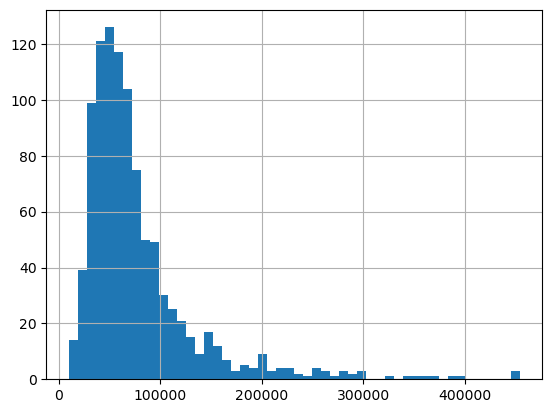

In [130]:
df.Price.hist(bins=50)  # параметр bins определяет число столбиков

<Axes: >

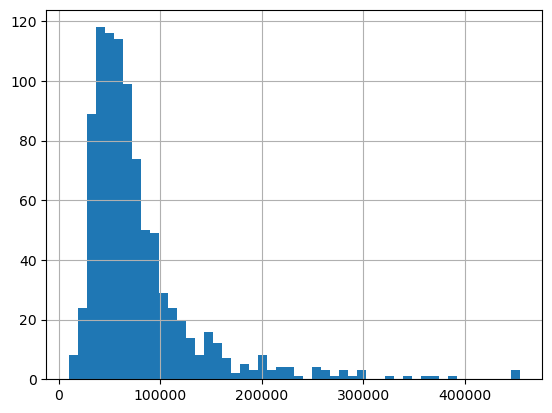

In [131]:
# только для ОС Windows
df[df.OS=='windows'].Price.hist(bins=50)

Для категориальных переменных лучше строить столбчатую или круговую диаграмму.

<Axes: ylabel='count'>

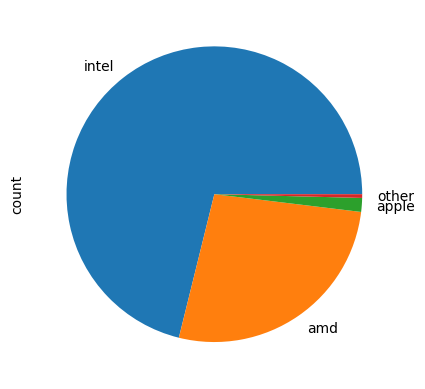

In [132]:
df.processor_brand.value_counts().plot(kind='pie')

<Axes: xlabel='processor_brand'>

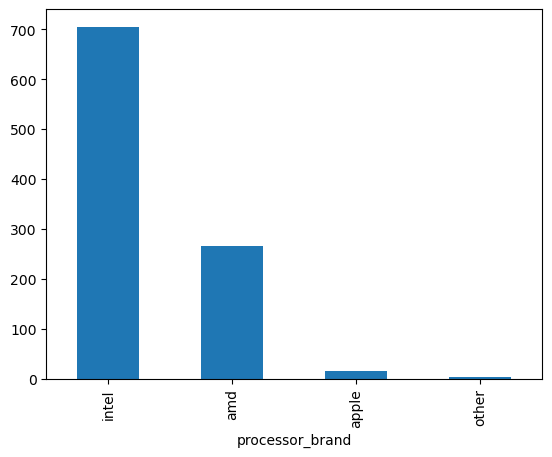

In [133]:
df.processor_brand.value_counts().plot(kind='bar')

<Axes: title={'center': 'Processor Brand'}, ylabel='count'>

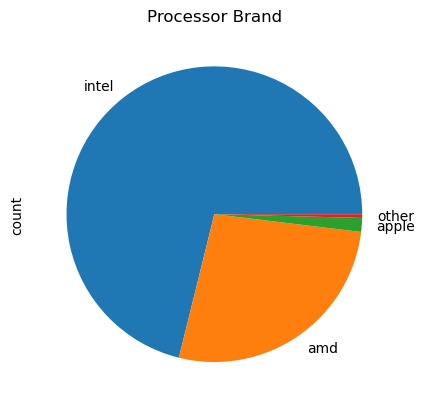

In [134]:
df.processor_brand.value_counts().plot(kind='pie', title = 'Processor Brand')  # у графика есть название

Построим столбчатую диаграмму с группировкой (bar) и с накоплением (stacked).

In [135]:
df.groupby(['processor_brand'])['Price_groups'].value_counts().unstack()

Price_groups,высокая,низкая,средняя
processor_brand,,,
amd,41.0,150.0,76.0
apple,14.0,NaN,1.0
intel,183.0,321.0,201.0
other,NaN,4.0,NaN


<Axes: xlabel='processor_brand,Price_groups'>

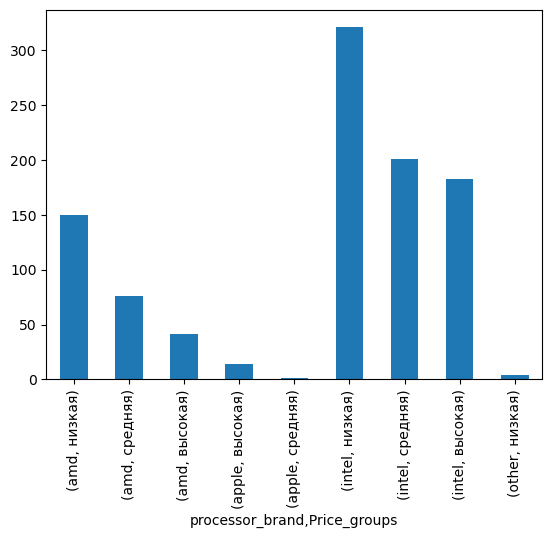

In [136]:
df.groupby(['processor_brand'])['Price_groups'].value_counts().plot(kind='bar')

<Axes: xlabel='processor_brand'>

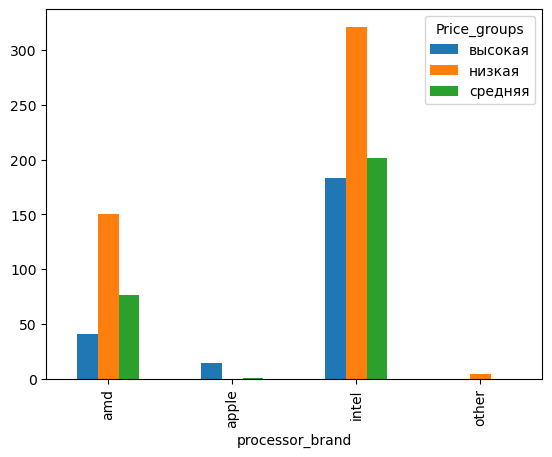

In [137]:
df.groupby(['processor_brand'])['Price_groups'].value_counts().unstack().plot(kind='bar')
# столбиковая диаграмма с группировкой

<Axes: xlabel='processor_brand'>

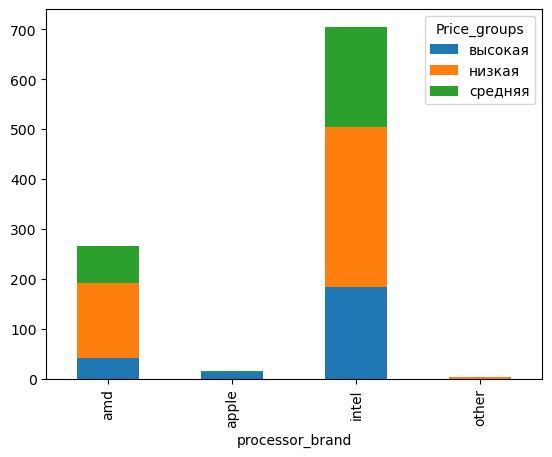

In [138]:
df.groupby(['processor_brand'])['Price_groups'].value_counts().unstack().plot(kind='bar', stacked=True)
# столбиковая диаграмма с накоплением (stacked)

Диаграмма рассеяния (scatter plot) — это график, на котором каждая точка отображает пару значений из двух переменных.

Ось X → значения одной переменной.

Ось Y → значения другой переменной.

Каждая точка на графике соответствует одной наблюдаемой паре (x, y).

Может использоваться для следующих целей:

- увидеть зависимость между переменными (линейная, нелинейная, отсутствие взаимосвязи);

- для поиска кластеров или выбросов в данных;

- для проверки гипотез о корреляции.

<Axes: xlabel='Price', ylabel='Rating'>

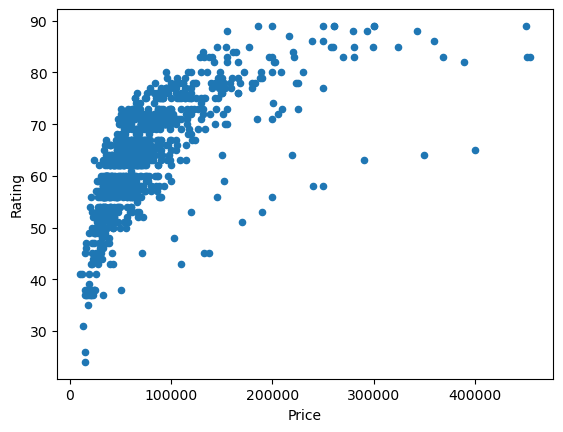

In [139]:
df.plot.scatter(x = 'Price', y = 'Rating')

Ящичковая диаграмма — это способ отображения распределения данных на основе пяти числовых характеристик: минимум, первый квартиль (Q1), медиана, третий квартиль (Q3) и максимум. Она позволяет выявлять выбросы.

<Axes: >

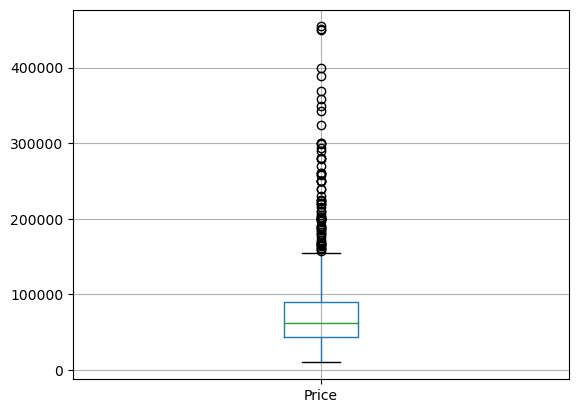

In [140]:
df.boxplot(column='Price')

<Axes: title={'center': 'Price'}, xlabel='OS'>

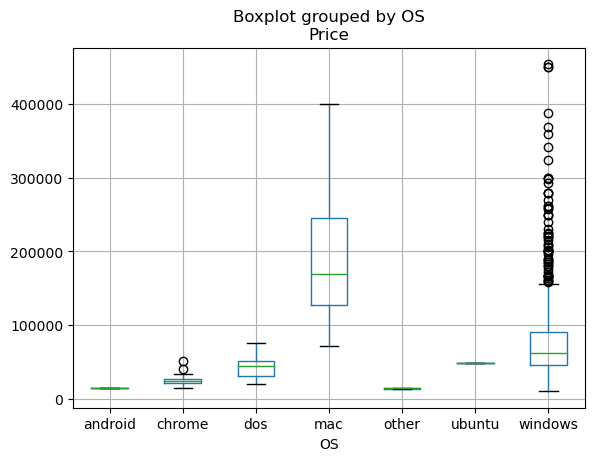

In [141]:
df.boxplot(column='Price', by='OS')  # ящичковая диаграмма с группировкой

## 10. Оценка нормальности распределения <a class="anchor" id="chapter10"></a>

<Axes: xlabel='Price', ylabel='Density'>

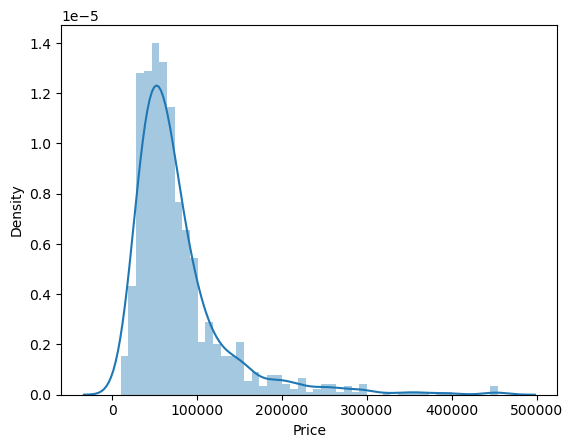

In [142]:
import warnings
warnings.filterwarnings('ignore')  # не показываем предупреждения
import seaborn as sns

sns.distplot(df.Price.dropna())  # график распределения значений

In [143]:
from scipy.stats import norm
# мпортируем команду, которая задает нормальное распределение

<Axes: xlabel='Price', ylabel='Density'>

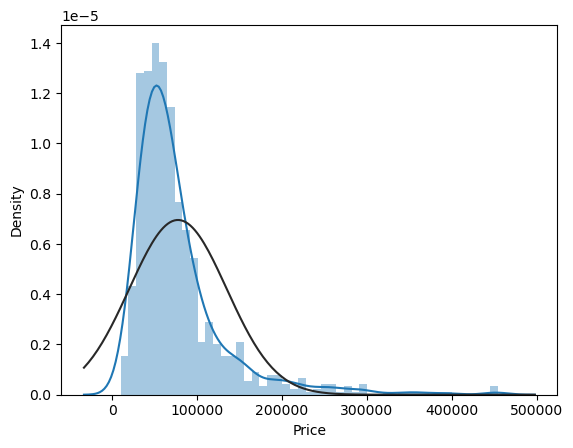

In [144]:
sns.distplot(df.Price.dropna(), fit=norm)  # добавляем график нормального распределения поверх существующего

<Axes: xlabel='Rating', ylabel='Density'>

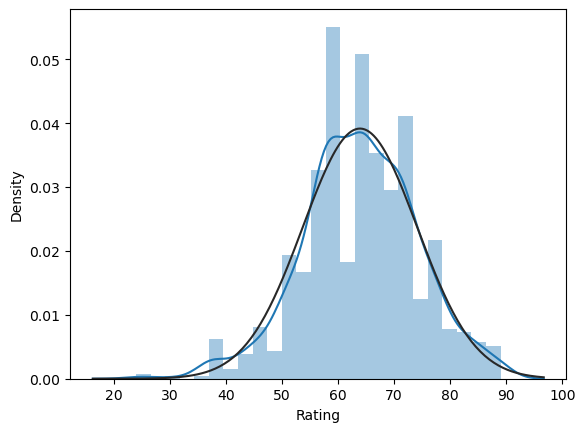

In [145]:
sns.distplot(df.Rating.dropna(), fit=norm)

In [146]:
df.Price.skew()  # асимметрия

2.779862726618332

Распределение имеет положительную асимметрию. В выборке превалируют дешевые ноутбуки.

In [147]:
df.Price.kurtosis()  # эксцесс

10.605194361964383

Распределение пиковое, большинство значений сконцентрированы в довольно узком диапазоне.

## 11. Построение графиков в библиотеке matplotlib <a class="anchor" id="chapter11"></a>

In [148]:
import matplotlib.pyplot as plt 
# используется библиотека matplotlib, а точнее её часть под названием pyplot

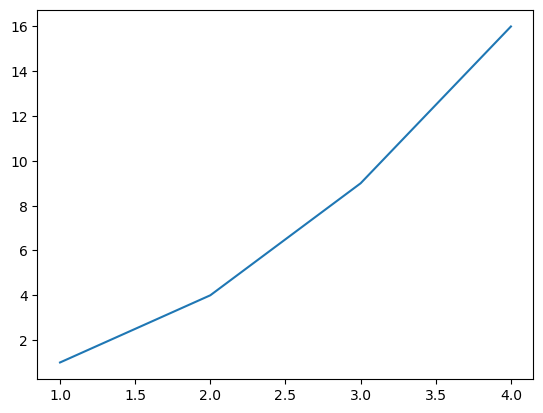

In [149]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# функция plot принимает на вход список x-координат, список y-координат и рисует ломаную

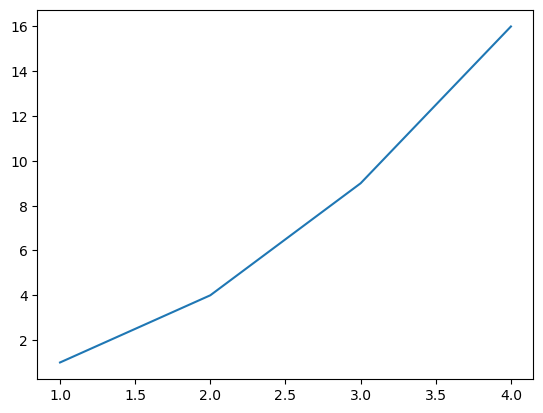

In [150]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()  # чтобы показать только график

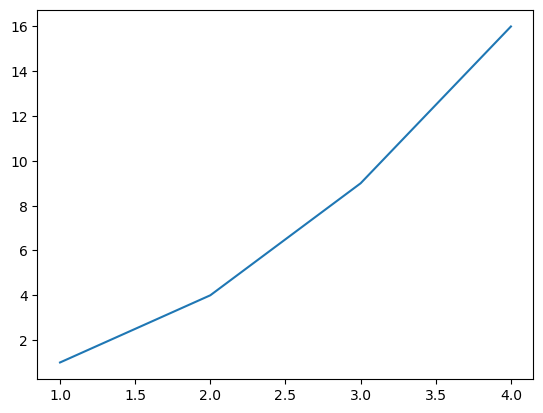

In [151]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]);  # ; в конце, чтобы показать только график

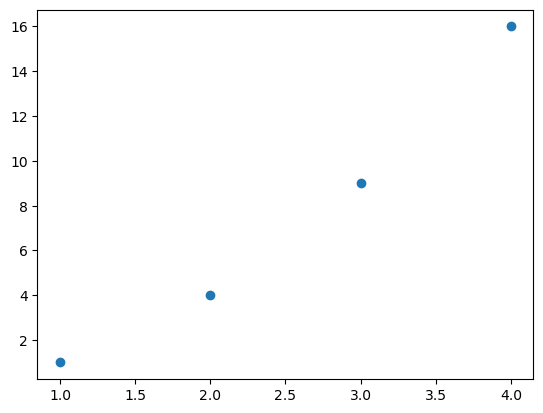

In [152]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'o');
# график из отдельных точек

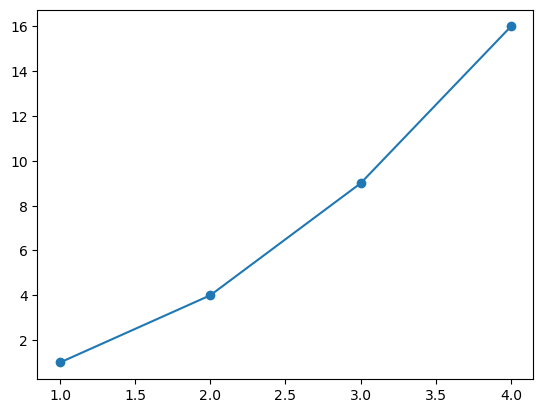

In [153]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], '-o');
# и точки, и линии

In [155]:
x = np.linspace(-5, 5, 200)
# это массив из 200 элементов, состоящий из равномерно разбросанных чисел от -5 до 5
print(x)
print(len(x))

[-5.         -4.94974874 -4.89949749 -4.84924623 -4.79899497 -4.74874372
 -4.69849246 -4.64824121 -4.59798995 -4.54773869 -4.49748744 -4.44723618
 -4.39698492 -4.34673367 -4.29648241 -4.24623116 -4.1959799  -4.14572864
 -4.09547739 -4.04522613 -3.99497487 -3.94472362 -3.89447236 -3.84422111
 -3.79396985 -3.74371859 -3.69346734 -3.64321608 -3.59296482 -3.54271357
 -3.49246231 -3.44221106 -3.3919598  -3.34170854 -3.29145729 -3.24120603
 -3.19095477 -3.14070352 -3.09045226 -3.04020101 -2.98994975 -2.93969849
 -2.88944724 -2.83919598 -2.78894472 -2.73869347 -2.68844221 -2.63819095
 -2.5879397  -2.53768844 -2.48743719 -2.43718593 -2.38693467 -2.33668342
 -2.28643216 -2.2361809  -2.18592965 -2.13567839 -2.08542714 -2.03517588
 -1.98492462 -1.93467337 -1.88442211 -1.83417085 -1.7839196  -1.73366834
 -1.68341709 -1.63316583 -1.58291457 -1.53266332 -1.48241206 -1.4321608
 -1.38190955 -1.33165829 -1.28140704 -1.23115578 -1.18090452 -1.13065327
 -1.08040201 -1.03015075 -0.9798995  -0.92964824 -0.

In [156]:
x[:10]

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869])

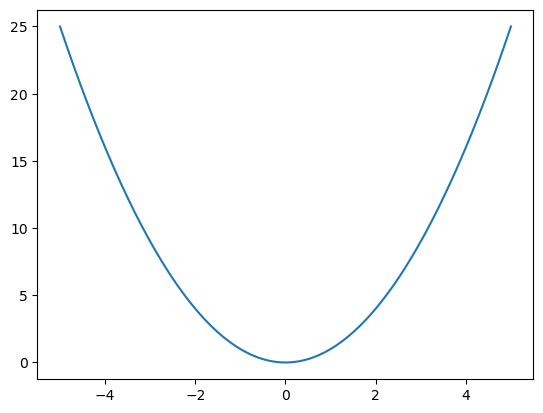

In [158]:
plt.plot(x, x**2);  # порабола

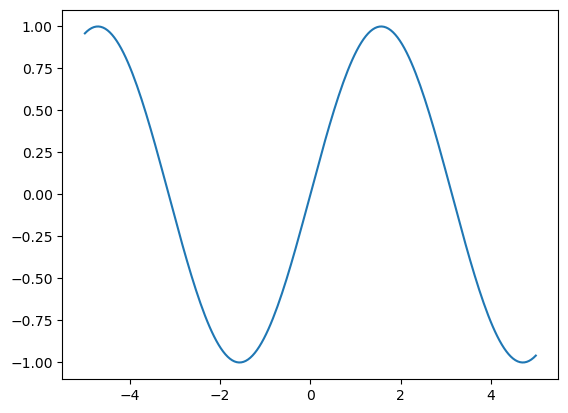

In [159]:
plt.plot(x, np.sin(x));  # синусоида

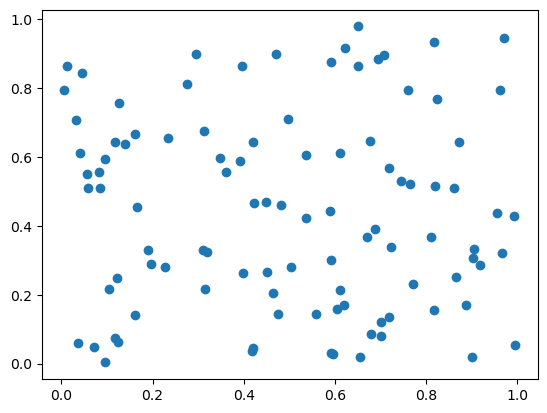

In [164]:
x = np.random.random(100)  # случайные числа
y = np.random.random(100)
plt.plot(x,y, 'o');

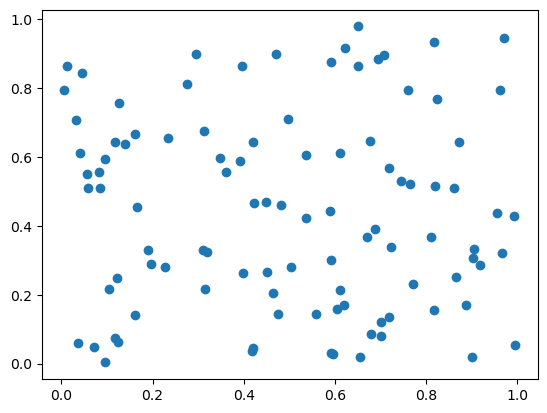

In [165]:
plt.scatter(x,y);  # специальная функция для создания диаграммы рассеивания

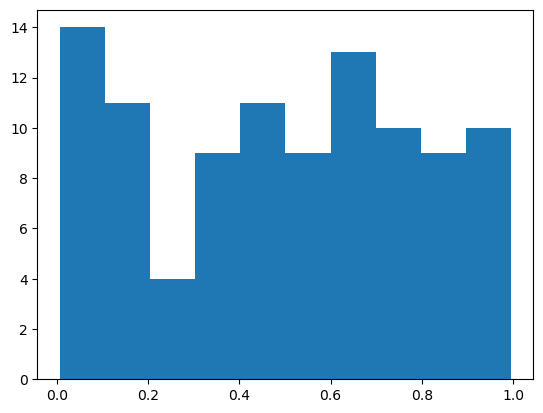

In [166]:
plt.hist(x);  # гистограмма

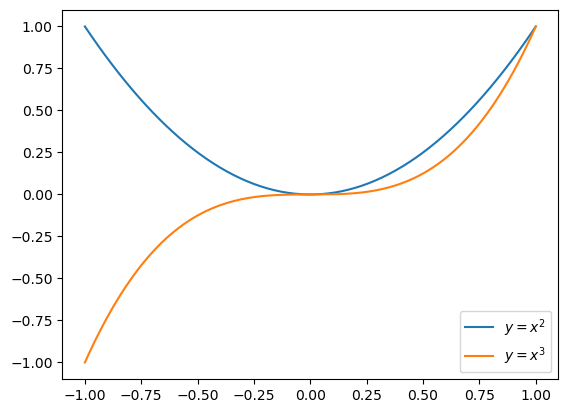

In [167]:
x = np.linspace(-1,1,201)
plt.plot(x,x**2, label = '$y = x^2$')  # Знак $ используется для записи формулы
plt.plot(x,x**3, label = '$y = x^3$')
plt.legend(loc='best');

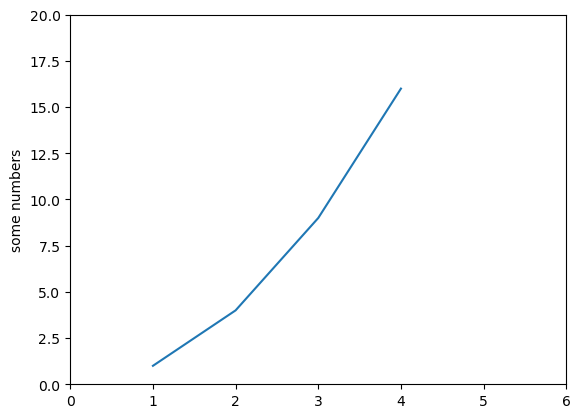

In [168]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('some numbers')  # подпись оси y
plt.axis([0, 6, 0, 20]);  # границы значений по осям


In [169]:
t = np.arange(0., 5., 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

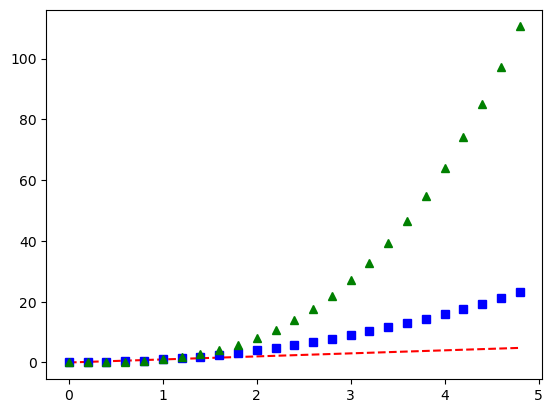

In [170]:
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^');

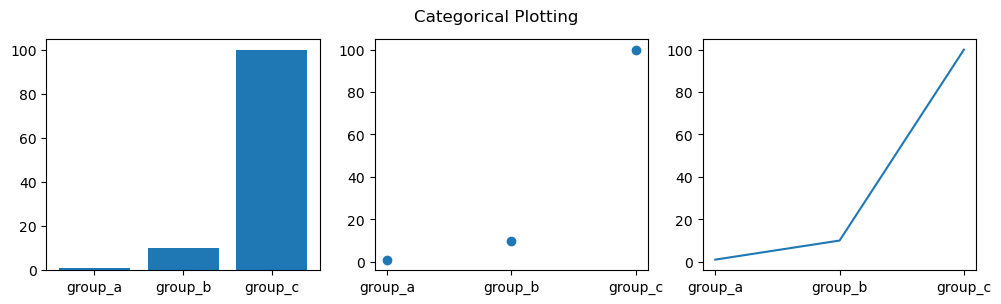

In [171]:
# визуализация категориальных переменных
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(12, 3))  # размер графика

plt.subplot(131)  # число строк, столбцов и номер графика
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

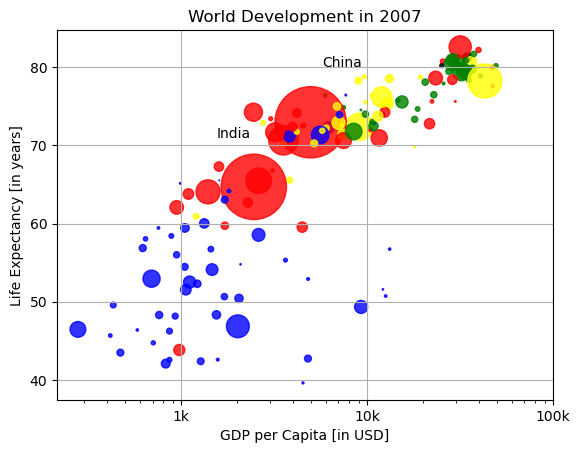

In [172]:
# Gapminder data 
import numpy as np

gdp_cap = [974.5803384,  5937.029525999998,  6223.367465,  4797.231267,  12779.37964,  34435.367439999995,  36126.4927,  29796.04834,  1391.253792,  33692.60508,  1441.284873,  3822.137084,  7446.298803,  12569.85177,  9065.800825,  10680.79282,  1217.032994,  430.0706916,  1713.778686,  2042.09524,  36319.23501,  706.016537,  1704.063724,  13171.63885,  4959.114854,  7006.580419,  986.1478792,  277.5518587,  3632.557798,  9645.06142,  1544.750112,  14619.222719999998,  8948.102923,  22833.30851,  35278.41874,  2082.4815670000007,  6025.3747520000015,  6873.262326000001,  5581.180998,  5728.353514,  12154.08975,  641.3695236000002,  690.8055759,  33207.0844,  30470.0167,  13206.48452,  752.7497265,  32170.37442,  1327.60891,  27538.41188,  5186.050003,  942.6542111,  579.2317429999998,  1201.637154,  3548.3308460000007,  39724.97867,  18008.94444,  36180.78919,  2452.210407,  3540.651564,  11605.71449,  4471.061906,  40675.99635,  25523.2771,  28569.7197,  7320.8802620000015,  31656.06806,  4519.461171,  1463.249282,  1593.06548,  23348.139730000006,  47306.98978,  10461.05868,  1569.331442,  414.5073415,  12057.49928,  1044.770126,  759.3499101,  12451.6558,  1042.581557,  1803.151496,  10956.99112,  11977.57496,  3095.7722710000007,  9253.896111,  3820.17523,  823.6856205,  944.0,  4811.060429,  1091.359778,  36797.93332,  25185.00911,  2749.320965,  619.6768923999998,  2013.977305,  49357.19017,  22316.19287,  2605.94758,  9809.185636,  4172.838464,  7408.905561,  3190.481016,  15389.924680000002,  20509.64777,  19328.70901,  7670.122558,  10808.47561,  863.0884639000002,  1598.435089,  21654.83194,  1712.472136,  9786.534714,  862.5407561000002,  47143.17964,  18678.31435,  25768.25759,  926.1410683,  9269.657808,  28821.0637,  3970.095407,  2602.394995,  4513.480643,  33859.74835,  37506.41907,  4184.548089,  28718.27684,  1107.482182,  7458.396326999998,  882.9699437999999,  18008.50924,  7092.923025,  8458.276384,  1056.380121,  33203.26128,  42951.65309,  10611.46299,  11415.80569,  2441.576404,  3025.349798,  2280.769906,  1271.211593,  469.70929810000007] 
life_exp = [43.828,  76.423,  72.301,  42.731,  75.32,  81.235,  79.829,  75.635,  64.062,  79.441,  56.728,  65.554,  74.852,  50.728,  72.39,  73.005,  52.295,  49.58,  59.723,  50.43,  80.653,  44.74100000000001,  50.651,  78.553,  72.961,  72.889,  65.152,  46.462,  55.322,  78.782,  48.328,  75.748,  78.273,  76.486,  78.332,  54.791,  72.235,  74.994,  71.33800000000002,  71.878,  51.57899999999999,  58.04,  52.947,  79.313,  80.657,  56.735,  59.448,  79.406,  60.022,  79.483,  70.259,  56.007,  46.38800000000001,  60.916,  70.19800000000001,  82.208,  73.33800000000002,  81.757,  64.69800000000001,  70.65,  70.964,  59.545,  78.885,  80.745,  80.546,  72.567,  82.603,  72.535,  54.11,  67.297,  78.623,  77.58800000000002,  71.993,  42.592,  45.678,  73.952,  59.44300000000001,  48.303,  74.241,  54.467,  64.164,  72.801,  76.195,  66.803,  74.543,  71.164,  42.082,  62.069,  52.90600000000001,  63.785,  79.762,  80.204,  72.899,  56.867,  46.859,  80.196,  75.64,  65.483,  75.53699999999998,  71.752,  71.421,  71.688,  75.563,  78.098,  78.74600000000002,  76.442,  72.476,  46.242,  65.528,  72.777,  63.062,  74.002,  42.56800000000001,  79.972,  74.663,  77.926,  48.159,  49.339,  80.941,  72.396,  58.556,  39.613,  80.884,  81.70100000000002,  74.143,  78.4,  52.517,  70.616,  58.42,  69.819,  73.923,  71.777,  51.542,  79.425,  78.242,  76.384,  73.747,  74.249,  73.422,  62.698,  42.38399999999999,  43.487] 
pop = [31.889923,  3.600523,  33.333216,  12.420476,  40.301927,  20.434176,  8.199783,  0.708573,  150.448339,  10.392226,  8.078314,  9.119152,  4.552198,  1.639131,  190.010647,  7.322858,  14.326203,  8.390505,  14.131858,  17.696293,  33.390141,  4.369038,  10.238807,  16.284741,  1318.683096,  44.22755,  0.71096,  64.606759,  3.80061,  4.133884,  18.013409,  4.493312,  11.416987,  10.228744,  5.46812,  0.496374,  9.319622,  13.75568,  80.264543,  6.939688,  0.551201,  4.906585,  76.511887,  5.23846,  61.083916,  1.454867,  1.688359,  82.400996,  22.873338,  10.70629,  12.572928,  9.947814,  1.472041,  8.502814,  7.483763,  6.980412,  9.956108,  0.301931,  1110.396331,  223.547,  69.45357,  27.499638,  4.109086,  6.426679,  58.147733,  2.780132,  127.467972,  6.053193,  35.610177,  23.301725,  49.04479,  2.505559,  3.921278,  2.012649,  3.193942,  6.036914,  19.167654,  13.327079,  24.821286,  12.031795,  3.270065,  1.250882,  108.700891,  2.874127,  0.684736,  33.757175,  19.951656,  47.76198,  2.05508,  28.90179,  16.570613,  4.115771,  5.675356,  12.894865,  135.031164,  4.627926,  3.204897,  169.270617,  3.242173,  6.667147,  28.674757,  91.077287,  38.518241,  10.642836,  3.942491,  0.798094,  22.276056,  8.860588,  0.199579,  27.601038,  12.267493,  10.150265,  6.144562,  4.553009,  5.447502,  2.009245,  9.118773,  43.997828,  40.448191,  20.378239,  42.292929,  1.133066,  9.031088,  7.554661,  19.314747,  23.174294,  38.13964,  65.068149,  5.701579,  1.056608,  10.276158,  71.158647,  29.170398,  60.776238,  301.139947,  3.447496,  26.084662,  85.262356,  4.018332,  22.211743,  11.746035,  12.311143] 
col = ['red',  'green',  'blue',  'blue',  'yellow',  'black',  'green',  'red',  'red',  'green',  'blue',  'yellow',  'green',  'blue',  'yellow',  'green',  'blue',  'blue',  'red',  'blue',  'yellow',  'blue',  'blue',  'yellow',  'red',  'yellow',  'blue',  'blue',  'blue',  'yellow',  'blue',  'green',  'yellow',  'green',  'green',  'blue',  'yellow',  'yellow',  'blue',  'yellow',  'blue',  'blue',  'blue',  'green',  'green',  'blue',  'blue',  'green',  'blue',  'green',  'yellow',  'blue',  'blue',  'yellow',  'yellow',  'red',  'green',  'green',  'red',  'red',  'red',  'red',  'green',  'red',  'green',  'yellow',  'red',  'red',  'blue',  'red',  'red',  'red',  'red',  'blue',  'blue',  'blue',  'blue',  'blue',  'red',  'blue',  'blue',  'blue',  'yellow',  'red',  'green',  'blue',  'blue',  'red',  'blue',  'red',  'green',  'black',  'yellow',  'blue',  'blue',  'green',  'red',  'red',  'yellow',  'yellow',  'yellow',  'red',  'green',  'green',  'yellow',  'blue',  'green',  'blue',  'blue',  'red',  'blue',  'green',  'blue',  'red',  'green',  'green',  'blue',  'blue',  'green',  'red',  'blue',  'blue',  'green',  'green',  'red',  'red',  'blue',  'red',  'blue',  'yellow',  'blue',  'green',  'blue',  'green',  'yellow',  'yellow',  'yellow',  'red',  'red',  'red',  'blue',  'blue'] 

plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

plt.grid(True)

plt.show()

Про графики в Python:
- https://python-graph-gallery.com/
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/